In [1]:
# imported libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures

# local imports
import wrangle as w

# ignore warning
import warnings
warnings.filterwarnings('ignore')

# Exploration Working Notebook

In [2]:
import wrangle as w

In [ ]:
# cleaned dataferame
df = w.wrangle_data()

df.head(3)

In [ ]:
# aggregated and grouped by dataframe

new_df = w.wrangle_data()
new_df.head(3)

In [3]:
train, val, test = w.wrangle_data()
train.shape, val.shape, test.shape

((378318, 11), (81068, 11), (81069, 11))

In [4]:
train.head(3)

,invoice_no,stock_code,description,quantity,unit_price,customer_id,country,total_price,quantity_outliers,unit_price_outliers,total_price_outliers
invoice_date,,,,,,,,,,,
2011-10-31 12:43:00,573531,85019B,BLOSSOM IMAGES NOTEBOOK SET,0.010000,0.000070,12909,United Kingdom,0.001540,1.0,0.0,1.0
2010-12-08 12:49:00,537789,22867,HAND WARMER BIRD DESIGN,0.002500,0.000118,14051,United Kingdom,0.000647,0.0,0.0,0.0
2011-08-23 17:31:00,564199,22697,GREEN REGENCY TEACUP AND SAUCER,0.000208,0.000165,13263,United Kingdom,0.000076,0.0,0.0,0.0


In [5]:
train[['quantity', 'unit_price', 'total_price']].head()

,quantity,unit_price,total_price
invoice_date,,,
2011-10-31 12:43:00,0.010000,0.000070,0.001540
2010-12-08 12:49:00,0.002500,0.000118,0.000647
2011-08-23 17:31:00,0.000208,0.000165,0.000076
2011-08-31 13:41:00,0.000000,0.000165,0.000000
2011-09-14 10:40:00,0.005000,0.000117,0.001281


In [6]:
train_scaled, val_scaled, test_scaled = w.wrangle_data()
train_scaled.shape, val_scaled.shape, test_scaled.shape

((378318, 11), (81068, 11), (81069, 11))

In [ ]:
train_scaled.head(3)

In [7]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 378318 entries, 2011-10-31 12:43:00 to 2011-03-17 15:03:00
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   invoice_no            378318 non-null  object 
 1   stock_code            378318 non-null  object 
 2   description           378318 non-null  object 
 3   quantity              378318 non-null  float64
 4   unit_price            378318 non-null  float64
 5   customer_id           378318 non-null  object 
 6   country               378318 non-null  object 
 7   total_price           378318 non-null  float64
 8   quantity_outliers     378318 non-null  float64
 9   unit_price_outliers   378318 non-null  float64
 10  total_price_outliers  378318 non-null  float64
dtypes: float64(6), object(5)
memory usage: 34.6+ MB


In [8]:
train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,378318.0,0.002102,0.008104,0.0,0.000208,0.000625,0.002083,1.0
unit_price,378318.0,0.000261,0.004494,0.0,0.000070,0.000117,0.000232,1.0
total_price,378318.0,0.000497,0.002541,0.0,0.000087,0.000250,0.000446,1.0
quantity_outliers,378318.0,0.104238,0.305569,0.0,0.000000,0.000000,0.000000,1.0
unit_price_outliers,378318.0,0.073391,0.260777,0.0,0.000000,0.000000,0.000000,1.0
total_price_outliers,378318.0,0.078558,0.269048,0.0,0.000000,0.000000,0.000000,1.0


In [9]:
train_scaled.head(50)  

,invoice_no,stock_code,description,quantity,unit_price,customer_id,country,total_price,quantity_outliers,unit_price_outliers,total_price_outliers
invoice_date,,,,,,,,,,,
2011-10-31 12:43:00,573531,85019B,BLOSSOM IMAGES NOTEBOOK SET,0.010000,0.000070,12909,United Kingdom,0.001540,1.0,0.0,1.0
2010-12-08 12:49:00,537789,22867,HAND WARMER BIRD DESIGN,0.002500,0.000118,14051,United Kingdom,0.000647,0.0,0.0,0.0
2011-08-23 17:31:00,564199,22697,GREEN REGENCY TEACUP AND SAUCER,0.000208,0.000165,13263,United Kingdom,0.000076,0.0,0.0,0.0
2011-08-31 13:41:00,C564956,21452,TOADSTOOL MONEY BOX,0.000000,0.000165,16303,United Kingdom,0.000000,0.0,0.0,0.0
2011-09-14 10:40:00,566633,23241,TREASURE TIN GYMKHANA DESIGN,0.005000,0.000117,17193,United Kingdom,0.001281,1.0,0.0,1.0
2011-10-17 11:27:00,571328,21724,PANDA AND BUNNIES STICKER SHEET,0.002500,0.000048,12473,Germany,0.000262,0.0,0.0,0.0
2011-10-27 16:41:00,573130,22371,AIRLINE BAG VINTAGE TOKYO 78,0.000417,0.000238,13969,United Kingdom,0.000218,0.0,0.0,0.0
2011-09-15 14:07:00,566913,22371,AIRLINE BAG VINTAGE TOKYO 78,0.000208,0.000238,17602,United Kingdom,0.000109,0.0,0.0,0.0
2011-03-31 12:08:00,548461,20676,RED RETROSPOT BOWL,0.001042,0.000070,14527,United Kingdom,0.000160,0.0,0.0,0.0


## New features below based on features present:

In [10]:
train.total_price.value_counts()

total_price
0.000385    14214
0.000508     7700
0.000000     7305
0.000032     6766
0.000063     6461
            ...  
0.004471        1
0.013992        1
0.001828        1
0.007991        1
0.003184        1
Name: count, Length: 4158, dtype: int64

In [11]:
train.total_price.head()

invoice_date
2011-10-31 12:43:00    0.001540
2010-12-08 12:49:00    0.000647
2011-08-23 17:31:00    0.000076
2011-08-31 13:41:00    0.000000
2011-09-14 10:40:00    0.001281
Name: total_price, dtype: float64

## Can we see patterns, find signals in the data?

## What features are driving the outcome?

## Are there other features we can construct that have stronger relationships?

## Visualization and statistical testing

## I want to walk away from exploration with with modeling strategies (feature selection, algorithm selection, evaluation methods, etc.).

## Lets take a look at the distributions of all features in the data

## What is the distribution of scaled numerical features?

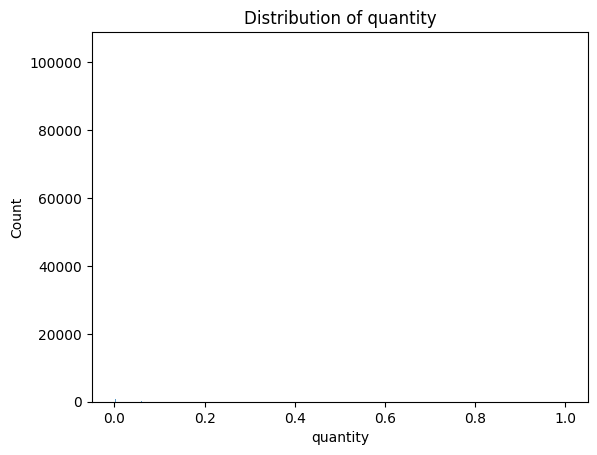

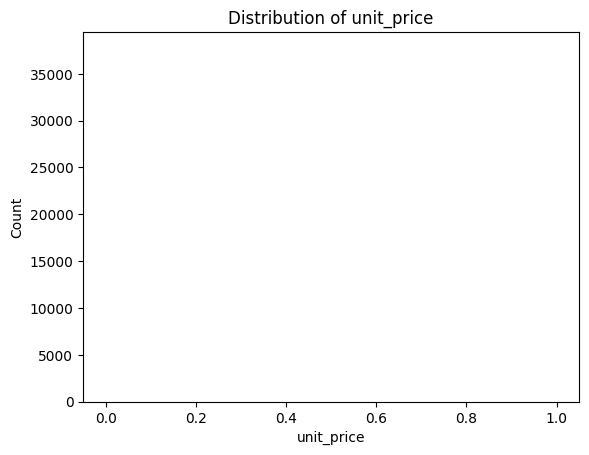

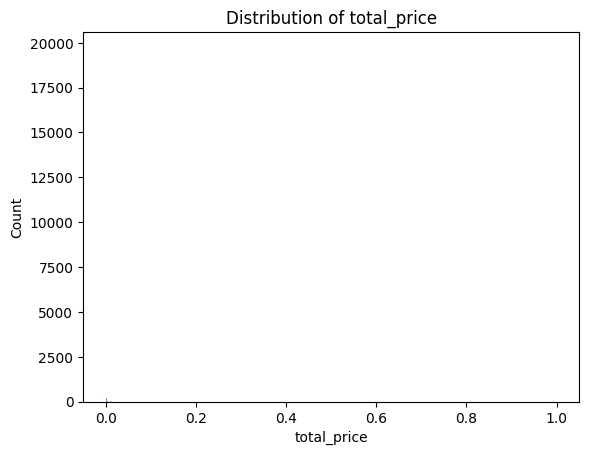

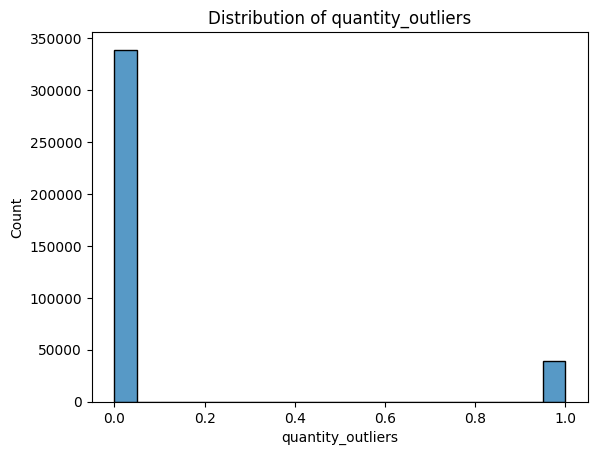

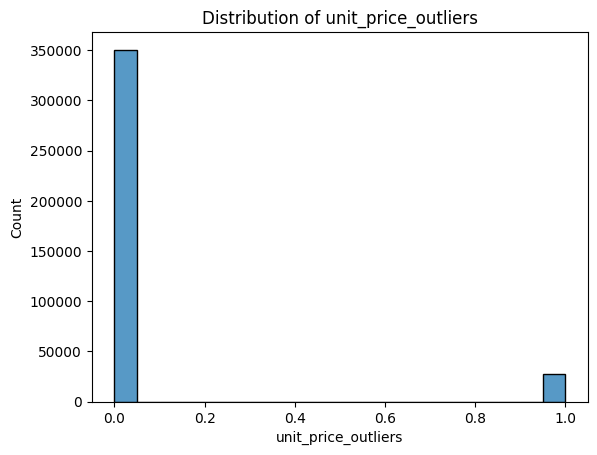

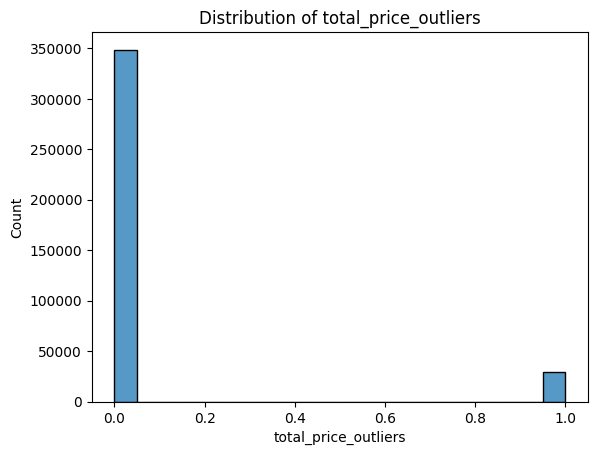

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = train_scaled.columns[(train_scaled.dtypes == 'float64') | (train_scaled.dtypes == 'int64')]

# Created histograms for numeric columns
for col in numeric_cols:
    plt.figure()
    plt.title(f'Distribution of {col}')
    sns.histplot(data=train_scaled, x=col)
    plt.show()

## Categorical data

## What is the distribution of categorical features?

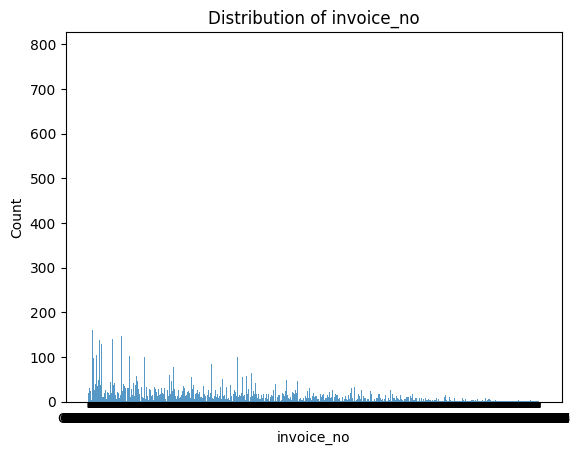

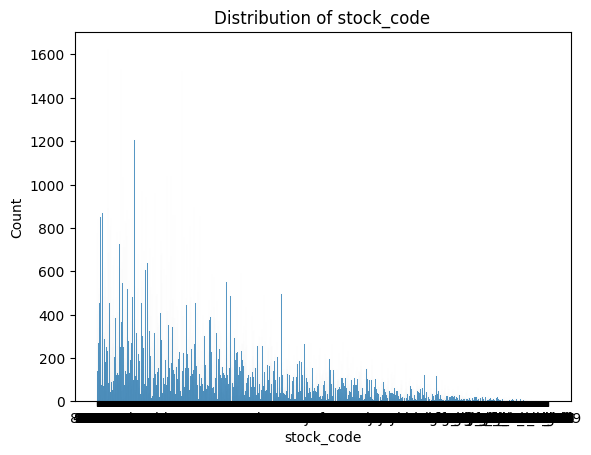

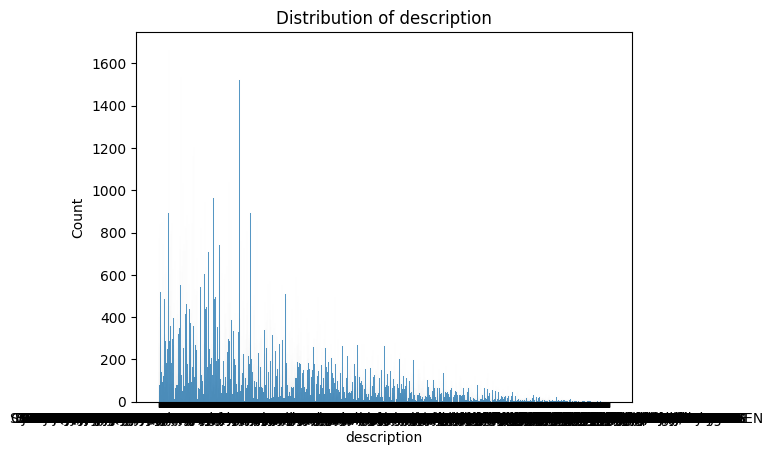

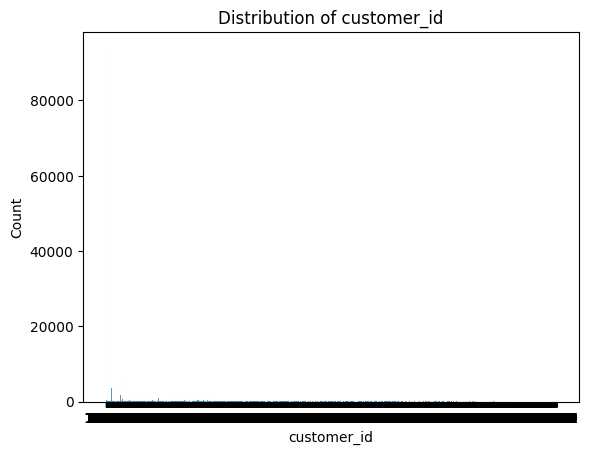

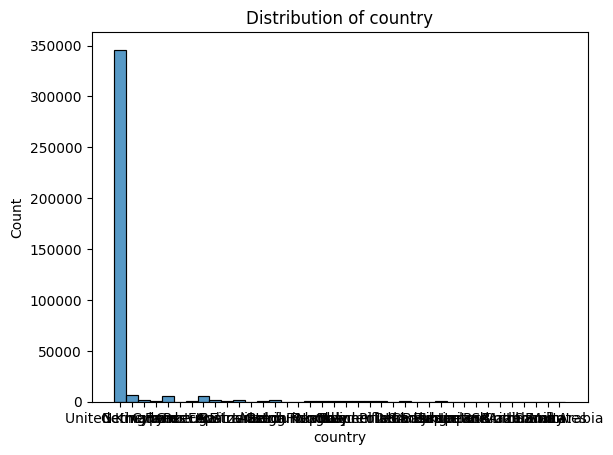

In [15]:
for col in train_scaled.columns[train_scaled.dtypes == 'object']:
    plt.figure()
    plt.title(f'Distribution of {col}')
    sns.histplot(data=train_scaled, x=col)
    plt.show()

# What does the correlation between all numerical features?

In [ ]:
sns.pairplot(data = train, corner=True)

# what is the `country` count distributions within this data?

In [ ]:
country_cnts = train.country.value_counts()
country_cnts = pd.DataFrame(country_cnts).reset_index()
country_cnts = country_cnts[country_cnts['count'] > 1000]

In [ ]:
# set figsze
plt.figure(figsize=(15, 10))

# Create the bar plot
ax = sns.barplot(data=country_cnts, x='count', y='country', palette='bright')

# remove spines
sns.despine(left=True, bottom=True)

# adding values at the end of each bar
for p in ax.patches:
    
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

# Remove x-tick labels, keeping the ticks
ax.set_xticklabels([])
ax.set_xticks([])

# Remove y ticks
ax.tick_params(axis='y', which='both', left=False)
# ax.tick_params(axis='x', which='both', bottom=False, xlabel=None)

        
# set labels
plt.title('Country Distribution')

# capitalize the y-axis labels
ax.set_yticklabels([label.get_text().upper() for label in ax.get_yticklabels()])

plt.ylabel('Country', rotation=0, labelpad=30)
plt.xlabel('')
plt.tight_layout()
plt.show()

* The data is comprised of alot of infmormation relating to the United Kingdom

## How does `quantity` vary with `customer_id`?

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quantity', y='customer_id', data=df)
plt.title('Quantity vs. Customers')
plt.xlabel('Quantity')
plt.ylabel('Customer ID')
plt.show()

## how about `unit_price` and `customer_id`?

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='unit_price', y='customer_id', data=df)
plt.title('Unit Price vs. Customers')
plt.xlabel('Unit Price')
plt.ylabel('Customer ID')
plt.show()

# How would scaling and normalizing features aid in getting a better visualization of distribution that exist within this dataset?

# Code added to prep function to handle negative values:

In [ ]:
# df['quantity'] = df['quantity'].apply(lambda x: max(x, 0))
    
# df['unit_price'] = df['unit_price'].apply(lambda x: max(x, 0))

In [ ]:
df = df.copy()

mms = MinMaxScaler()

df_scaled = mms.fit(df['quantity',
                    'unit_price',
                    'total_price']])


In [ ]:
df.head()

In [ ]:
df.total_price.value_counts()

In [ ]:
sns.lineplot(x=df.index, y=df.total_price)